In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
import pandas_datareader as pdr
from datetime import datetime

In [20]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']


end = datetime.now()
start = datetime(datetime.now().year - 1,datetime.now().month,datetime.now().day)

In [21]:
for stock in tech_list:   
    # それぞれの名前でDataFrameを作ります。
    # globals()[stock] = DataReader(stock, 'yahoo', start, end)
    #@ pandas_datareaderを使います。　もし動かなかったら、Q&Aへお問い合わせください。
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)    

In [22]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-01,74.750000,71.462502,71.562500,72.267502,240616800.0,71.711632
2020-05-04,73.422501,71.580002,72.292503,73.290001,133568000.0,72.726265
2020-05-05,75.250000,73.614998,73.764999,74.389999,147751200.0,73.817802
2020-05-06,75.809998,74.717499,75.114998,75.157501,142333600.0,74.579391
2020-05-07,76.292503,75.492500,75.805000,75.934998,115215200.0,75.350914


In [23]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-05-01 to 2021-04-30
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


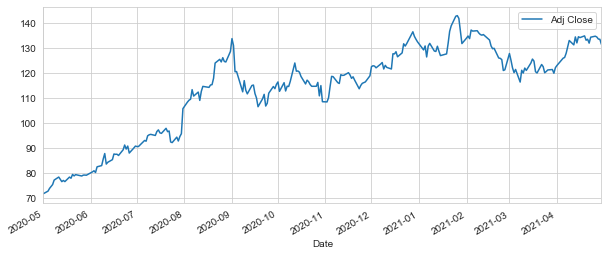

In [24]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

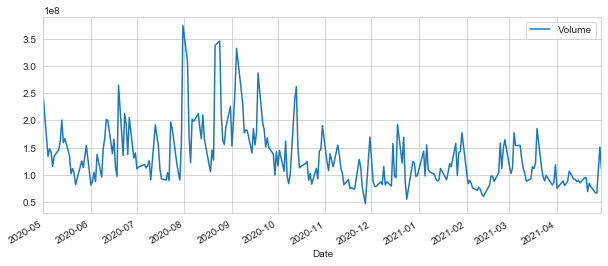

In [25]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [27]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

In [28]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2020-05-01,74.750000,71.462502,71.562500,72.267502,240616800.0,71.711632,NaN,NaN,NaN
2020-05-04,73.422501,71.580002,72.292503,73.290001,133568000.0,72.726265,NaN,NaN,NaN
2020-05-05,75.250000,73.614998,73.764999,74.389999,147751200.0,73.817802,NaN,NaN,NaN
2020-05-06,75.809998,74.717499,75.114998,75.157501,142333600.0,74.579391,NaN,NaN,NaN
2020-05-07,76.292503,75.492500,75.805000,75.934998,115215200.0,75.350914,NaN,NaN,NaN


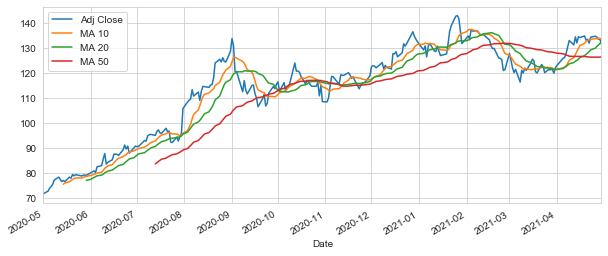

In [29]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [30]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [31]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2020-05-01,74.750000,71.462502,71.562500,72.267502,240616800.0,71.711632,NaN,NaN,NaN,NaN
2020-05-04,73.422501,71.580002,72.292503,73.290001,133568000.0,72.726265,NaN,NaN,NaN,0.014149
2020-05-05,75.250000,73.614998,73.764999,74.389999,147751200.0,73.817802,NaN,NaN,NaN,0.015009
2020-05-06,75.809998,74.717499,75.114998,75.157501,142333600.0,74.579391,NaN,NaN,NaN,0.010317
2020-05-07,76.292503,75.492500,75.805000,75.934998,115215200.0,75.350914,NaN,NaN,NaN,0.010345


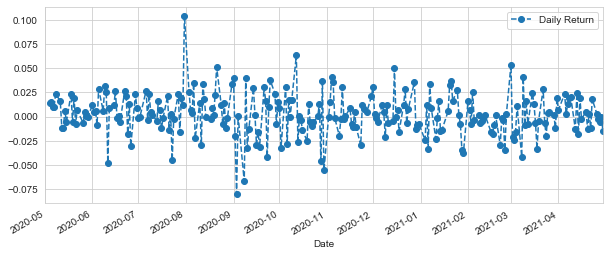

In [33]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

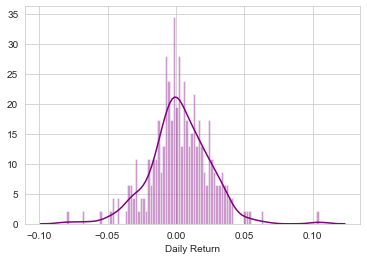

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

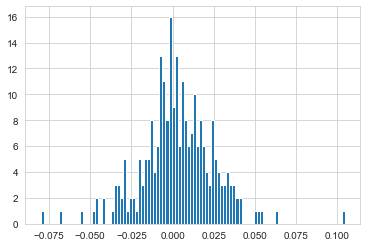

In [37]:
AAPL['Daily Return'].hist(bins=100)

In [38]:
closing_df = pdr.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [39]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-01,71.711632,1320.609985,172.813858,2286.040039
2020-05-04,72.726265,1326.800049,177.040894,2315.989990
2020-05-05,73.817802,1351.109985,178.941589,2317.800049
2020-05-06,74.579391,1347.300049,180.703674,2351.260010
2020-05-07,75.350914,1372.560059,181.753021,2367.610107


In [40]:
tech_rets = closing_df.pct_change()

In [41]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-01,NaN,NaN,NaN,NaN
2020-05-04,0.014149,0.004687,0.024460,0.013101
2020-05-05,0.015009,0.018322,0.010736,0.000782
2020-05-06,0.010317,-0.002820,0.009847,0.014436
2020-05-07,0.010345,0.018749,0.005807,0.006954


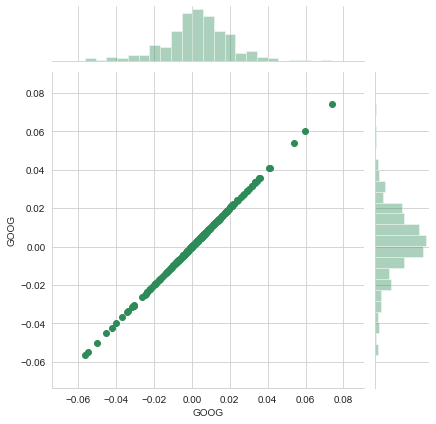

In [42]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

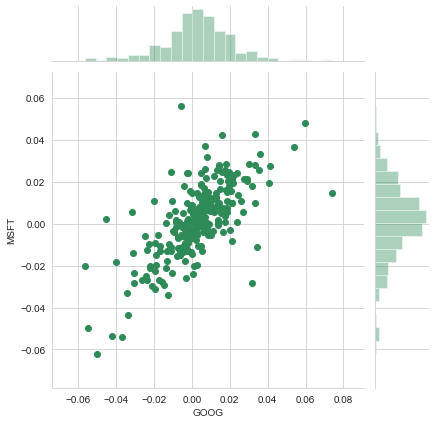

In [44]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


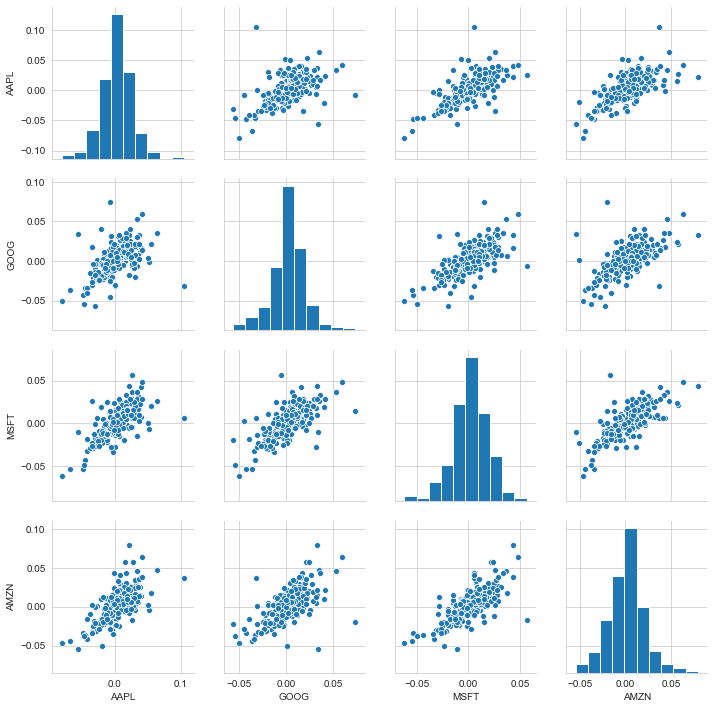

In [45]:
sns.pairplot(tech_rets)

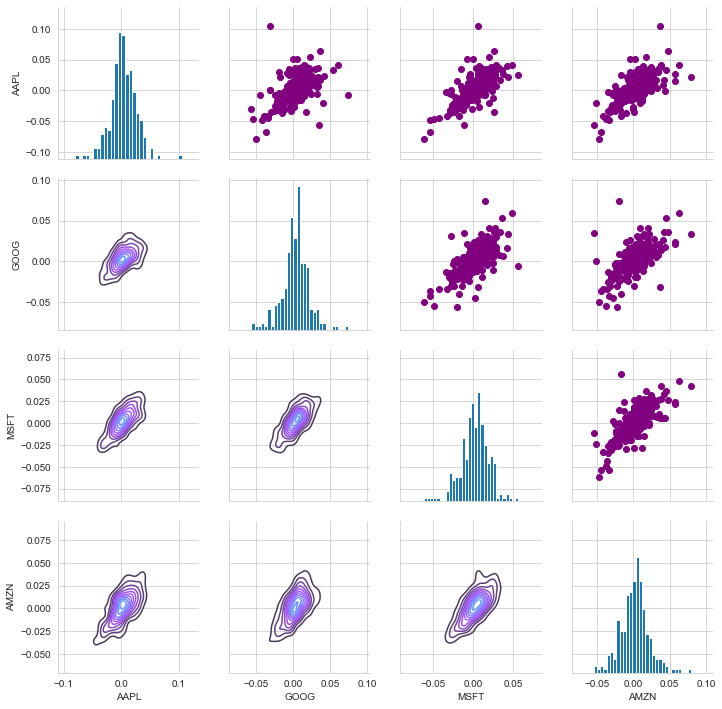

In [47]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

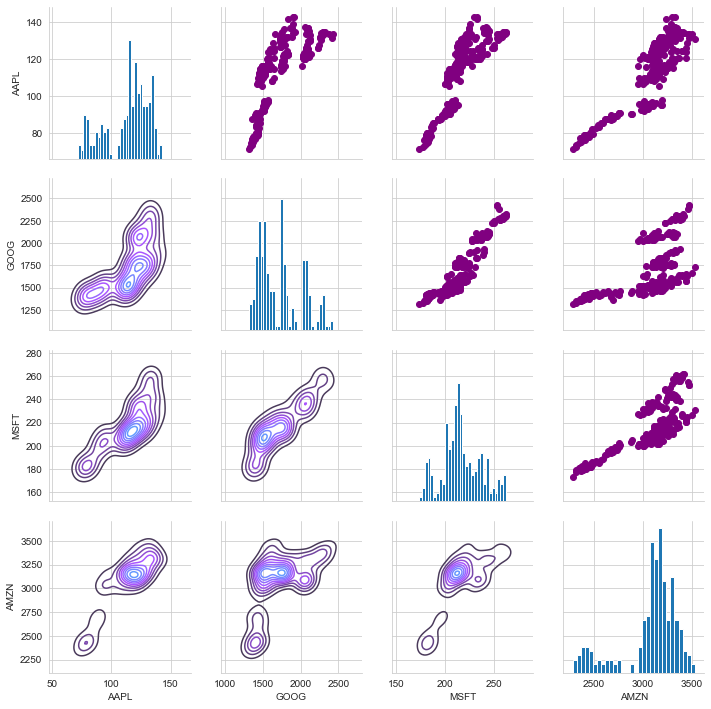

In [48]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

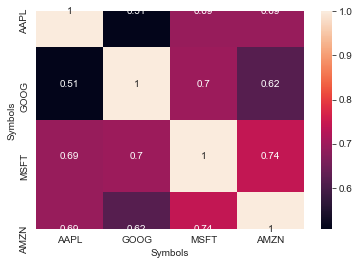

In [50]:
sns.heatmap(tech_rets.corr(), annot=True)

In [51]:
rets = tech_rets.dropna()

In [52]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-05-04,0.014149,0.004687,0.024460,0.013101
2020-05-05,0.015009,0.018322,0.010736,0.000782
2020-05-06,0.010317,-0.002820,0.009847,0.014436
2020-05-07,0.010345,0.018749,0.005807,0.006954
2020-05-08,0.023802,0.011519,0.005882,0.005068


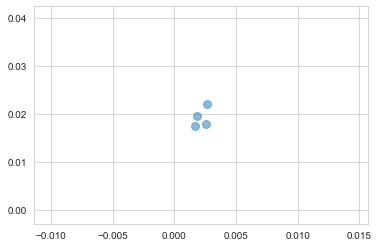

In [53]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

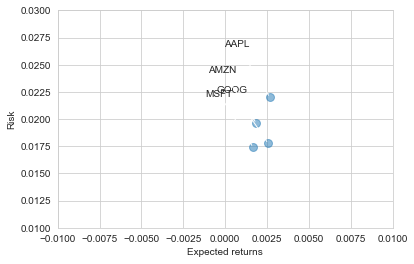

In [60]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.xlim([-0.01, 0.01])
plt.ylim([0.01, 0.03])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 50),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))

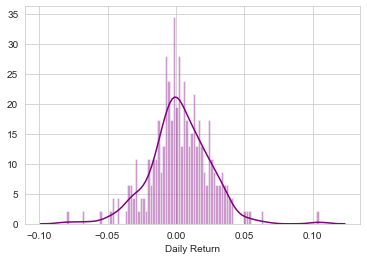

In [61]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [62]:
rets.AAPL.quantile(0.05)

-0.03315361052905319

In [63]:
# 1年を基準にします。
days = 365

# 1日分の差分です。
dt = 1/days

# 日々の変動の平均を計算します。
mu = rets.mean()['GOOG']

# ボラティリティ（volatility：株価の変動の振れ幅）を変動の標準偏差で計算します。
sigma = rets.std()['GOOG']

In [69]:
def stock_monte_calro(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで、計算します。
    for x in range(1,days):
        #  shockを計算します
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算します。
        drift[x] = mu * dt
        # これらを使って価格を計算します。
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [70]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-01,1352.069946,1311.000000,1328.500000,1320.609985,2072500,1320.609985
2020-05-04,1327.660034,1299.000000,1308.229980,1326.800049,1504000,1326.800049
2020-05-05,1373.939941,1337.459961,1337.920044,1351.109985,1651500,1351.109985
2020-05-06,1371.119995,1347.290039,1361.689941,1347.300049,1215400,1347.300049
2020-05-07,1377.599976,1355.270020,1365.939941,1372.560059,1397600,1372.560059


In [71]:
GOOG.iloc[0,5]

1320.6099853515625

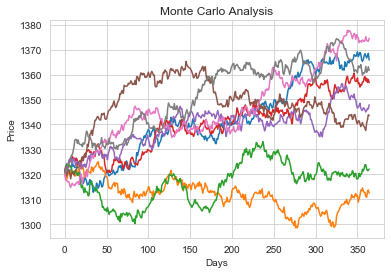

In [74]:
start_price = GOOG.iloc[0,5]

for run in range(8):
    plt.plot(stock_monte_calro(start_price, days, mu, sigma))
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Monte Carlo Analysis')

In [75]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_calro(start_price, days, mu, sigma)[days-1]

(array([2., 1., 3., ..., 0., 0., 1.]),
 array([1251.30410224, 1252.1063447 , 1252.90858716, ..., 1410.1481087 ,
        1410.95035116, 1411.75259362]),
 <a list of 200 Patch objects>)

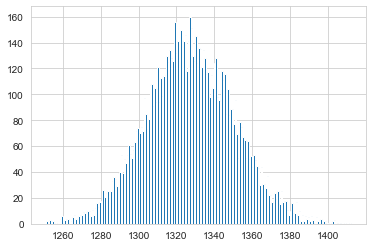

In [76]:
plt.hist(simulations, bins=200)

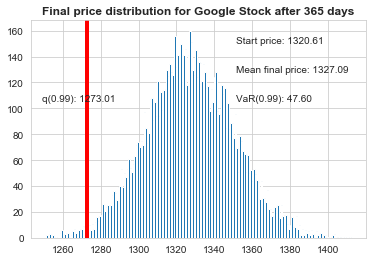

In [77]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

# 最初の株価
plt.figtext(0.6, 0.8, s="Start price: {:0.2f}".format(start_price))
# 最終的な株価の平均値
plt.figtext(0.6, 0.7, "Mean final price: {:0.2f}".format(simulations.mean()))

# Value at Risk (信頼区間99%）
plt.figtext(0.6, 0.6, "VaR(0.99): {:0.2f}".format(start_price - q))

# 1パーセンタイル
plt.figtext(0.15, 0.6, "q(0.99): {:0.2f}".format(q))

# 1% クォンタイルに線を描きます
plt.axvline(x=q, linewidth=4, color='r')

# タイトル
plt.title("Final price distribution for Google Stock after {} days".format(days), weight='bold');